In [320]:
%matplotlib inline
import pandas as pd
import numpy as np
import pandas_profiling as pp

#modelos de selecção e tratamento dos dados
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#modelos de machinelearning usados
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#plot da matrix de cunfusão
from sklearn.metrics import classification_report, confusion_matrix


import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import os

#download do dataset: https://www.kaggle.com/datasets/kandij/diabetes-dataset

In [321]:
df = pd.read_csv('diabetes2.csv')

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [323]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [324]:
df.shape

(768, 9)

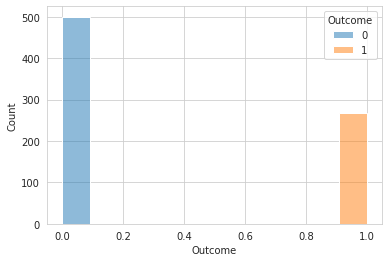

In [325]:
sns.histplot(x=df['Outcome'], hue= df['Outcome'])
plt.show()

Variáveis correlacionadas

A pressão arterial está correlacionada com o IMC

As Gravidez estão correlacionadas com a idade

BloodPressure, SkinThinkness, Insulin não pode ser zero, eles devem ser preenchidos, logo foi preenchindo o valor médio das colunas para cada zero.

limpando os dados

A insulina tem um grande número de zeros, portanto,será descartada a coluna.

In [326]:
#df.drop(['Insulin','Glucose','DiabetesPedigreeFunction'], axis =1, inplace = True)
df.drop(['Insulin','DiabetesPedigreeFunction'], axis =1,inplace = True)
#for i in ['BloodPressure','SkinThickness','Insulin']:
for i in ['BloodPressure','SkinThickness']:
    df[i].replace(0,np.nan,inplace =True)
    df[i].fillna(df[i].mean(),inplace = True)

In [327]:
df.skew()

Pregnancies      0.901674
Glucose          0.173754
BloodPressure    0.137305
SkinThickness    0.822173
BMI             -0.428982
Age              1.129597
Outcome          0.635017
dtype: float64

alguns dos features estão distorcidos.


Aqui usamos 'yeo-johnson' porque ele pode lidar com os valores negativos e zero.

divisão dos dados, em treino e test.

foi utilizado alguns modelos nos mesmos conjuntos.

In [328]:
X = df.drop('Outcome', axis =1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [329]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

pt = PowerTransformer(method = 'yeo-johnson')
#min_max = MinMaxScaler()
std_scaler = StandardScaler()
X_train = pd.DataFrame(data =std_scaler.fit_transform(pt.fit_transform(X_train)),columns = X_train.columns)

In [330]:
df_pt= pd.merge(X_train,y_train,right_index= True,left_index= True)
df_pt.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,Age,Outcome
count,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,0.032235,0.023316,0.021919,0.008648,0.042889,0.023240,0.345946
std,0.972703,1.018311,0.992801,0.971193,0.987623,0.992605,0.476320
min,-1.606051,-3.660528,-3.382035,-2.681880,-3.718453,-1.468399,0.000000
25%,-0.818641,-0.648671,-0.660252,-0.541543,-0.630958,-0.838257,0.000000
50%,0.064067,-0.092035,-0.026613,0.073703,-0.010851,-0.087096,0.000000
75%,0.854084,0.622345,0.632756,0.403720,0.624032,0.942827,1.000000
max,2.162908,2.436209,4.166075,3.696525,4.968874,2.105762,1.000000


In [331]:
X_test= pd.DataFrame(data =std_scaler.transform(pt.transform(X_test)),columns = X_test.columns)

X_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,Age
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,0.090225,0.004071,0.042596,0.137377,0.015391,0.047918
std,1.050848,0.967368,0.976011,1.079367,1.082291,1.001702
min,-1.606051,-1.845207,-2.129026,-2.835502,-3.718453,-1.468399
25%,-0.818641,-0.725788,-0.680611,-0.180400,-0.497787,-0.838257
50%,0.064067,-0.184968,0.006659,0.073703,0.075649,-0.087096
75%,1.053607,0.746903,0.467439,0.518184,0.627426,0.942827
max,1.939237,2.373411,3.484963,7.104764,3.520738,1.865476


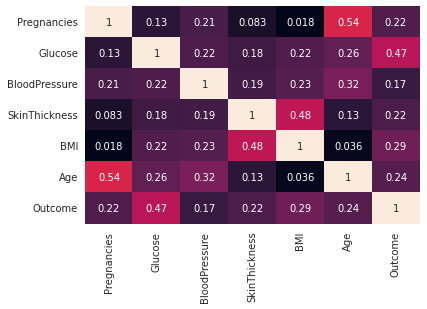

In [332]:
sns.heatmap(df.corr(),annot= True, cbar = False)

Divisão dos dados em treino e teste

In [334]:
df_mean_std_train = pd.DataFrame(data = [X_train.mean(), X_train.std()], columns = X_train.columns)
df_mean_std_test = pd.DataFrame(data = [X_test.mean(), X_test.std()], columns = X_test.columns)
df_mean_std_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,Age
0,-2.646342e-17,0.000000,-3.307927e-18,-1.323171e-17,8.269818e-18,-3.307927e-18
1,1.000932e+00,1.000932,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00


A média sé quase 0 e o st dev está próximo de 1 para a escala padrão
do min_max_scalar.

os dados irão variar de 0 a 1 ou -1 a 1.

Geralmente, o escalonamento é feito nos dados de treinamento separadamente, isso é feito para garantir que não haja overfit.

Aplicando os modelos de MachineLearning

Modelo de Regressão logistica "Logistic Regression"

In [335]:
lrmodel = LogisticRegression()

lrmodel.fit(X_train,y_train)

lr_predict = lrmodel.predict(X_test)

In [336]:
print(classification_report(y_test,lr_predict))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       151
           1       0.60      0.59      0.59        80

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



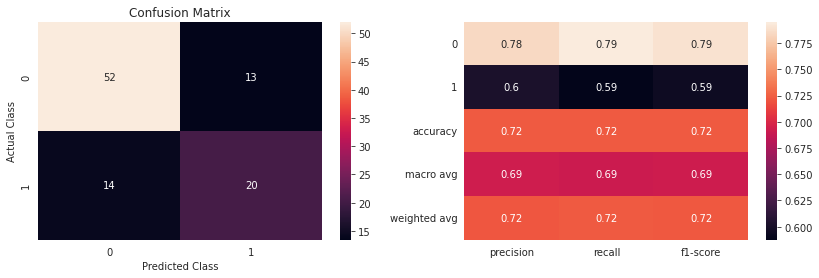

In [337]:
con_mat = confusion_matrix(y_test,lr_predict)
plt.figure(figsize=(14,4)) 
plt.subplot(1,2,1)
sns.heatmap(con_mat/np.sum(con_mat)*100,annot =True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

plt.subplot(1,2,2)
sns.heatmap(pd.DataFrame(classification_report(y_test,lr_predict,output_dict=True)).T.iloc[:,:-1], annot = True)

plt.show()

modelo Decision Trees


In [338]:
dt= DecisionTreeClassifier()

dt.fit(X_train,y_train)

pred_dt = dt.predict(X_test)

In [339]:
print(classification_report(y_test,pred_dt))
#print(confusion_matrix(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       151
           1       0.52      0.57      0.54        80

    accuracy                           0.67       231
   macro avg       0.64      0.65      0.64       231
weighted avg       0.68      0.67      0.67       231



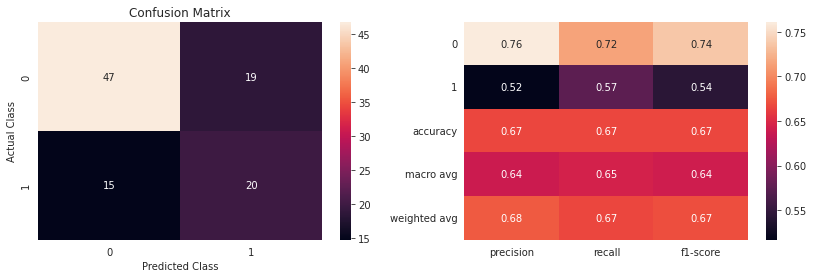

In [340]:
con_mat = confusion_matrix(y_test,pred_dt)
plt.figure(figsize=(14,4)) 
plt.subplot(1,2,1)
sns.heatmap(con_mat/np.sum(con_mat)*100,annot =True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

plt.subplot(1,2,2)
sns.heatmap(pd.DataFrame(classification_report(y_test,pred_dt,output_dict=True)).T.iloc[:,:-1], annot = True)

plt.show()

o modelo que possue uma melhor accuracy entre os dois é a Regressão logistica